# Zipline Installation: Bundle Ingest & Algorithm Test

## Imports and Settings

We don't need much here since the imports all take place in the cell where we formulate the algorithm.

In [44]:
!pip3 install matplotlib

import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import zipline

## Load Zipline extension

In [45]:
%load_ext zipline
%zipline --help


The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline
Usage: %zipline [OPTIONS]

  Run a backtest for the given algorithm.

Options:
  -f, --algofile FILENAME         The file that contains the algorithm to run.
  -t, --algotext TEXT             The algorithm script to run.
  -D, --define TEXT               Define a name to be bound in the namespace
                                  before executing the algotext. For example
                                  '-Dname=value'. The value may be any python
                                  expression. These are evaluated in order so
                                  they may refer to previously defined names.
  --data-frequency [minute|daily]
                                  The data frequency of the simulation.
                                  [default: daily]
  --capital-base FLOAT            The starting capital for the simulation.
                                  [default: 10000000.0]
  -b, --bundle BUNDLE

0

## Ingest Data
Please ignore the warnings as they are issues with dividends computation while processing the stock information, which is normal for the Quandl bundle.

In [46]:
!zipline ingest

[2021-12-29 16:49:17.305999] INFO: zipline.data.bundles.core: Ingesting quandl.
[2021-12-29 16:49:17.306107] INFO: zipline.data.bundles.quandl: Downloading WIKI metadata.
[2021-12-29 16:49:31.392959] INFO: zipline.data.bundles.quandl: Parsing raw data.
[2021-12-29 16:49:53.260659] INFO: zipline.data.bundles.quandl: Generating asset metadata.
Merging daily equity files:  [------------------#-----------------]  1731/Users/lcheong/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/zipline/data/bcolz_daily_bars.py:366: UserWarning: Ignoring 1 values because they are out of bounds for uint32:             open  high   low  close        volume  ex_dividend  split_ratio
2011-04-11  1.79  1.84  1.55    1.7  6.674913e+09          0.0          1.0
  winsorise_uint32(raw_data, invalid_data_behavior, "volume", *OHLC)
Merging daily equity files:  [####################################]      
[2021-12-29 16:50:47.148640] INFO: zipline.data.bundles.quandl: Parsing split data.
[2021-12-29 16:50:47.207

## Display Ingest History


In [47]:
!zipline bundles

csvdir <no ingestions>
quandl 2021-12-29 16:49:17.001606
quandl 2021-12-29 14:44:30.680554
quandl 2021-12-29 12:45:27.683428
quandl 2021-12-29 12:30:10.065440
quandl 2021-12-29 12:29:45.494725
quandl 2021-12-29 12:28:09.273931
quandl 2021-12-29 12:26:37.894880
quandl 2021-12-27 13:00:48.172394
quandl 2021-12-27 12:21:35.333396
quandl 2021-12-16 13:55:43.928709
quandl 2021-12-16 13:43:56.562065
quandl 2021-12-16 13:42:34.626354
quandl 2021-12-16 13:42:07.137670
quandl 2021-12-16 13:15:07.062579
quandl 2021-12-16 12:45:06.507771
quandl 2021-12-16 12:45:04.648271
quandl 2021-12-16 12:45:02.775608
quantopian-quandl <no ingestions>


## Implement Dual Moving Average

Based on the strategy covered in the following link:

https://zipline.ml4trading.io/beginner-tutorial.html#how-to-use-historical-prices-a-dual-moving-average-cross-over-example



Zipline ingests data starting from 2014-1-1 till 2018-1-1 and saves it as a pickle file in the local 01_set_up_environment_and_data directory.Once the short-mavg crosses the long-mavg from below we assume that the stock price has upwards momentum and long the stock. If the short-mavg crosses from above we exit the positions as we assume the stock to go down further. Backtest results are displayed at the end.

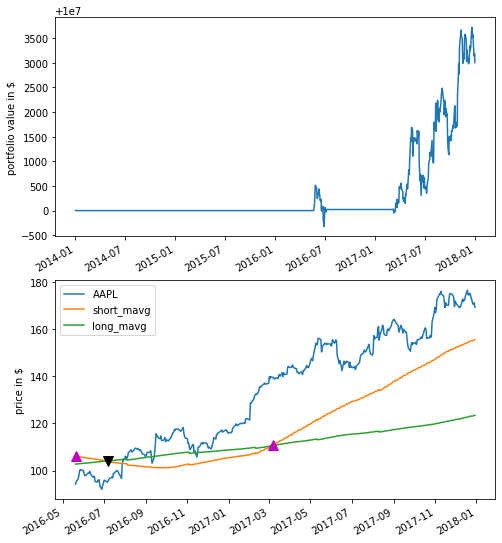

,period_open,period_close,short_value,starting_cash,gross_leverage,starting_value,pnl,capital_used,portfolio_value,positions,...,sortino,max_leverage,benchmark_period_return,benchmark_volatility,algorithm_period_return,excess_return,period_label,AAPL,short_mavg,long_mavg
2014-01-02 21:00:00+00:00,2014-01-02 14:31:00+00:00,2014-01-02 21:00:00+00:00,0.0,1.000000e+07,0.000000,0.0,0.0,0.0,1.000000e+07,[],...,NaN,0.000000,0.0,NaN,0.000000,0.0,2014-01,NaN,NaN,NaN
2014-01-03 21:00:00+00:00,2014-01-03 14:31:00+00:00,2014-01-03 21:00:00+00:00,0.0,1.000000e+07,0.000000,0.0,0.0,0.0,1.000000e+07,[],...,NaN,0.000000,0.0,0.0,0.000000,0.0,2014-01,NaN,NaN,NaN
2014-01-06 21:00:00+00:00,2014-01-06 14:31:00+00:00,2014-01-06 21:00:00+00:00,0.0,1.000000e+07,0.000000,0.0,0.0,0.0,1.000000e+07,[],...,NaN,0.000000,0.0,0.0,0.000000,0.0,2014-01,NaN,NaN,NaN
2014-01-07 21:00:00+00:00,2014-01-07 14:31:00+00:00,2014-01-07 21:00:00+00:00,0.0,1.000000e+07,0.000000,0.0,0.0,0.0,1.000000e+07,[],...,NaN,0.000000,0.0,0.0,0.000000,0.0,2014-01,NaN,NaN,NaN
2014-01-08 21:00:00+00:00,2014-01-08 14:31:00+00:00,2014-01-08 21:00:00+00:00,0.0,1.000000e+07,0.000000,0.0,0.0,0.0,1.000000e+07,[],...,NaN,0.000000,0.0,0.0,0.000000,0.0,2014-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,0.0,9.986080e+06,0.001749,17501.0,0.0,0.0,1.000358e+07,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",...,1.068169,0.001764,0.0,0.0,0.000358,0.0,2017-12,175.01,154.856400,123.016567
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,0.0,9.986080e+06,0.001705,17501.0,-444.0,0.0,1.000314e+07,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",...,0.904293,0.001764,0.0,0.0,0.000314,0.0,2017-12,170.57,155.018820,123.108880
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,0.0,9.986080e+06,0.001705,17057.0,3.0,0.0,1.000314e+07,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",...,0.904707,0.001764,0.0,0.0,0.000314,0.0,2017-12,170.60,155.182435,123.211233
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,0.0,9.986080e+06,0.001710,17060.0,48.0,0.0,1.000319e+07,"[{'sid': Equity(8 [AAPL]), 'amount': 100, 'cos...",...,0.918075,0.001764,0.0,0.0,0.000319,0.0,2017-12,171.08,155.341160,123.311580


In [48]:
%%zipline --start 2014-1-1 --end 2018-1-1 -o dma.pickle --no-benchmark

from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 600 days to get full windows
    context.i += 1
    if context.i < 600:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=600, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

def analyze(context, perf):
    cm=1/2.54
    fig, ((ax1,ax2)) = plt.subplots(2,1, figsize=(20*cm, 25*cm))
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.loc[[t != [] for t in perf.transactions]]
    buys = perf_trans.loc[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.loc[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.loc[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.loc[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()


## Run a simple test algorithm
The algorithm is defined with initialize and handle_data functions. 
The historical data runs from 2016-1-1 to 2018-1-1 with capital base of USD100,000
The stock selected is for Agilent (A) and benchmark_period_return and benchmark_volatility will be calculated based on Apple (AAPL) stocks.
Order is done for 100 stocks daily for Agilent (A) and the current price for this ticker is recorded/saved in each data call.

In [49]:
%%zipline --start 2016-1-1 --end 2018-1-1 --capital-base 100000 -o buymrvl_out.pickle 

from zipline.api import order, record, symbol
import pandas as pd

def initialize(context):
    context.asset = symbol('A')
    context.set_benchmark(symbol('AAPL'))


def handle_data(context, data):
    order(symbol('A'), 100)
    record(A=data.current(symbol('A'), 'price'))



,period_open,period_close,ending_exposure,long_value,ending_value,starting_value,orders,longs_count,returns,portfolio_value,...,sortino,benchmark_period_return,benchmark_volatility,algo_volatility,algorithm_period_return,max_drawdown,period_label,max_leverage,excess_return,treasury_period_return
2016-01-04 21:00:00+00:00,2016-01-04 14:31:00+00:00,2016-01-04 21:00:00+00:00,0.0,0.0,0.0,0.0,"[{'id': '32512d9d58af4618bf4277ba7e9a76e3', 'd...",0,0.000000,100000.0000,...,NaN,0.000855,NaN,NaN,0.000000,0.000000,2016-01,0.000000,0.0,0.0
2016-01-05 21:00:00+00:00,2016-01-05 14:31:00+00:00,2016-01-05 21:00:00+00:00,4055.0,4055.0,4055.0,0.0,"[{'id': '32512d9d58af4618bf4277ba7e9a76e3', 'd...",1,-0.000021,99997.8725,...,-11.224972,-0.024227,0.290913,0.000239,-0.000021,-0.000021,2016-01,0.040551,0.0,0.0
2016-01-06 21:00:00+00:00,2016-01-06 14:31:00+00:00,2016-01-06 21:00:00+00:00,8146.0,8146.0,8146.0,4055.0,"[{'id': '2c7a338aad7c4c0c8021e9abe68f14a7', 'd...",1,0.000159,100013.7360,...,59.175376,-0.043322,0.216788,0.001561,0.000137,-0.000021,2016-01,0.081449,0.0,0.0
2016-01-07 21:00:00+00:00,2016-01-07 14:31:00+00:00,2016-01-07 21:00:00+00:00,11700.0,11700.0,11700.0,8146.0,"[{'id': '5be7dec0d2584ab387d18615a088b2a6', 'd...",1,-0.003480,99665.6860,...,-7.623812,-0.083704,0.281760,0.028014,-0.003343,-0.003480,2016-01,0.117392,0.0,0.0
2016-01-08 21:00:00+00:00,2016-01-08 14:31:00+00:00,2016-01-08 21:00:00+00:00,15436.0,15436.0,15436.0,11700.0,"[{'id': 'b30f5b9542064e9e82692fbdd6477aa6', 'd...",1,-0.001254,99540.6565,...,-8.822371,-0.078856,0.309361,0.024443,-0.004593,-0.004730,2016-01,0.155072,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,2017-12-22 14:31:00+00:00,2017-12-22 21:00:00+00:00,3354030.0,3354030.0,3354030.0,3355744.0,"[{'id': 'e09b797512ae4867bf5b4f05360336cf', 'd...",1,-0.009288,901635.6655,...,2.636549,0.720778,0.206945,0.854097,8.016357,-0.502107,2017-12,9.955008,0.0,0.0
2017-12-26 21:00:00+00:00,2017-12-26 14:31:00+00:00,2017-12-26 21:00:00+00:00,3355775.0,3355775.0,3355775.0,3354030.0,"[{'id': 'a7fd36851e9c4acf9a4694980cf0f801', 'd...",1,-0.005527,896652.2030,...,2.628884,0.677122,0.207594,0.853279,7.966522,-0.502107,2017-12,9.955008,0.0,0.0
2017-12-27 21:00:00+00:00,2017-12-27 14:31:00+00:00,2017-12-27 21:00:00+00:00,3365000.0,3365000.0,3365000.0,3355775.0,"[{'id': '72c09872e9e64110bc197f6f347d93ce', 'd...",1,0.002779,899143.7380,...,2.628751,0.677417,0.207388,0.852428,7.991437,-0.502107,2017-12,9.955008,0.0,0.0
2017-12-28 21:00:00+00:00,2017-12-28 14:31:00+00:00,2017-12-28 21:00:00+00:00,3379245.0,3379245.0,3379245.0,3365000.0,"[{'id': 'a0df1b685ead4d0794cd9970215ca3a8', 'd...",1,0.008337,906640.2655,...,2.633603,0.682136,0.207184,0.851579,8.066403,-0.502107,2017-12,9.955008,0.0,0.0
